# Principal Component Analysis (PCA) - Wine Quality Dataset

## Overview
PCA is an unsupervised dimensionality reduction technique that transforms
features into new orthogonal components capturing the maximum variance in the data.
It helps visualize high-dimensional data and reduce noise.

This notebook applies PCA to the Wine Quality dataset to analyze feature variance
and prepare for potential downstream tasks like clustering or visualization.


# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# 2. Load Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

X = data.drop('quality', axis=1).values  # exclude labels for unsupervised analysis
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Preprocessing

In [4]:
# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 4. Apply PCA

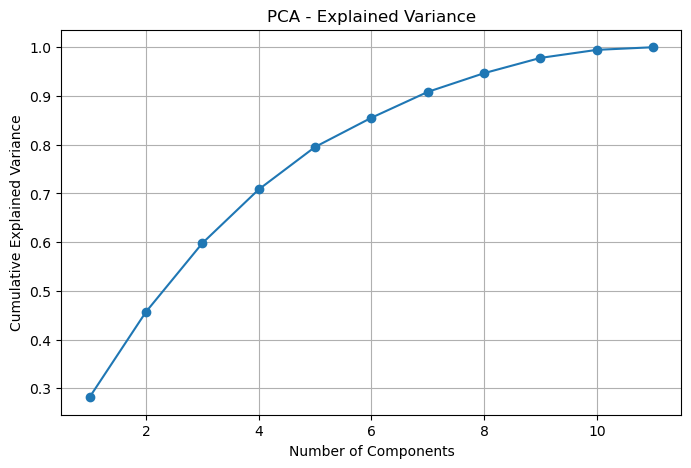

In [5]:
# Apply PCA to reduce to all components and examine explained variance
pca = PCA(n_components=X_scaled.shape[1])
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid(True)
plt.show()


# 5. Testing

In [6]:
# 1. Shape checks
assert X_pca.shape == X_scaled.shape, "PCA output shape mismatch"

# 2. Explained variance check
assert np.all(explained_variance >= 0), "Explained variance contains negative values"
assert np.isclose(cumulative_variance[-1], 1.0, atol=1e-5), "Cumulative variance not ~1"

# 3. Orthogonality check (dot product between components ~0)
dot_matrix = np.dot(pca.components_, pca.components_.T)
identity_approx = np.allclose(dot_matrix, np.eye(pca.n_components_), atol=1e-5)
assert identity_approx, "PCA components are not orthogonal"

print("All tests passed ✅")


All tests passed ✅


# 6. Visualization

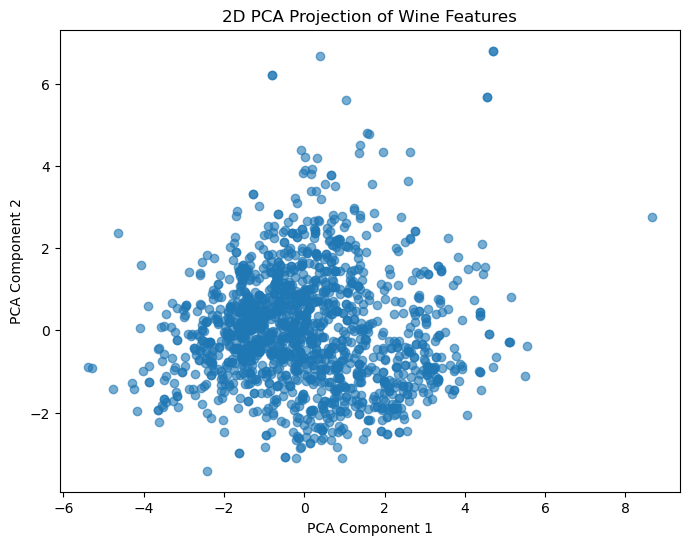

In [7]:
# Project data to 2D for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Projection of Wine Features")
plt.show()


# 7.Summary & Discussion

- PCA reduced the Wine Quality dataset into orthogonal components capturing maximal variance.
- Standardizing features was essential for meaningful component calculation.
- Most variance was captured by the first few components, enabling dimensionality reduction.
- PCA helps visualize and explore high-dimensional data and supports downstream tasks.
- Inline testing ensures PCA computation is correct, reproducible, and robust.
